# 5. LDA 

In [1]:
import numpy as np
import pandas as pd
from TTMonitor.preprocess import *
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Setup

In [50]:
COUNTRY = "uk"
NAME ="covid"

DATA_PATH = "data/uk_rawdata_20201226.pkl" # "uk_raw.pkl"

preprocess_params = {"include_hashtags": True}

include_keywords = ['covid', 'coronavirus', 'virus', 'covidiot', 'trumpvirus', 'test', 'safe',
 'coronaswimwewr', 'pandemic', 'mask', 'viruscoronavirus', 'wearamask', 'quarantine',
 'stayhome', 'sick', 'coronaviru', 'coviddays', 'CDC', 'Wuhancoronavirus', 'Wuhanlockdown',
 'Ncov', 'Wuhan', 'N95', 'Kungflu', 'Epidemic', 'outbreak', 'Sinophobia', 'China', 'covid-19',
 'covid19', 'sars-cov-2', 'COVIDー19', 'COVD', 'pandemic', 'coronapocalypse', 'Coronials', 'canceleverything',
 'SocialDistancingNow', 'Social', 'panicbuy', 'panic', '14DayQuarantine', 'DuringMy14DayQuarantine', 'InMyQuarantineSurvivalKit',
 'panic-buy', 'panic-shop', 'coronakindness', 'quarantinelife', 'chinesevirus7', 'chinese', 'stayhomechallenge',
 'sflockdown', 'DontBeASpreader', 'lockdown', 'lock', 'shelteringinplace', 'sheltering', 'staysafestayhome',
 'trumppandemic', 'flattenthecurve', 'flatten', 'china', 'chinavirus', 'quarentinelife',
 'PPEshortage', 'saferathome', 'stayathome', 'stayhome', 'GetMePPE', 'covidiot', 'epitwitter',
 'pandemie', 'wear', 'wearamask', 'kung', 'covididiot', 'COVID__19']
include_keywords = [word.lower() for word in include_keywords]
exclude_keywords = []

from nltk.corpus import stopwords
stopwords.words("english")
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

from nltk.tokenize.casual import TweetTokenizer
class SkTokenizer():
    def __init__(self):
        tfidf = TfidfVectorizer()
        self.tokenize = tfidf.build_tokenizer()
tokenizer = SkTokenizer()
#tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
lda_params = {"stop_words":stop_words, "tokenizer":tokenizer, "enrich":True,
              "doc_threshold":10, "similarity_threshold":0.8}

fit_params={"n_topics":20, "n_jobs":1, "no_below":5,
            "no_above":0.8,"passes":200,"chunksize":100}

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
include_keywords = pd.read_csv('dictionaries\entertainment.txt')
list = keywords.values.tolist()
print(len(list[0]))
print(include_keywords)

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \e
<>:1: DeprecationWarning: invalid escape sequence \e
<ipython-input-64-c35c596ece19>:1: DeprecationWarning: invalid escape sequence \e
  include_keywords = pd.read_csv('dictionaries\entertainment.txt')


1
              music
0            cinema
1     silver screen
2    movie industry
3               rap
4              rock
..              ...
110            emmy
111           party
112      live music
113         release
114          grammy

[115 rows x 1 columns]


# Load Data

In [68]:
#data= read_datafiles("C://Users/matze/Documents/Python_Projects/twitter-mining/data/uk")
#pickle.dump(data, open( "uk_raw.pkl", "wb" ) )
data1 = pickle.load( open( DATA_PATH, "rb" ) )

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preprocess
* define preprocessing
* define filter
* define stopwords

In [69]:
%%time
# PReprocessing
#json_data = [parse_tweet(data) for data in json_data]
data2 = parse_tweets(data1, **preprocess_params)


C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 5.79 s


In [70]:
%%time
# Filter
data = filter_tweets(data2, include_keywords)
data = filter_tweets(data, exclude_keywords, include=False)
print(data)

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/571906 [00:00<?, ?it/s]

  0%|          | 0/5625 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# LDA

In [71]:
%%time
from TTMonitor.TwitterLDA import TwitterLDA
tlda = TwitterLDA(data, **lda_params)
tlda.fit(**fit_params)
topics, scores = tlda.classify_tweets()
print(tlda.coherence)
tlda.get_topics()

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done with Pooling
Done with Enriching
Done with tokenizing
Done with Initializing
start fitting
Done fitting
0.68760397278975
Wall time: 2min 49s


[(0,
  [('teriah', 0.10796384),
   ('yr', 0.104703285),
   ('representationmatters', 0.09949177),
   ('loveislove', 0.09949177),
   ('cait', 0.07548836),
   ('vid', 0.07533298),
   ('enjoy', 0.04859436),
   ('family', 0.03810913),
   ('contract', 0.029794965),
   ('video', 0.0294944),
   ('asap', 0.029377088),
   ('part2', 0.026694093),
   ('screen', 0.024280176),
   ('need', 0.024159694),
   ('bring', 0.021418307)]),
 (1,
  [('spotify', 0.06387393),
   ('youtube', 0.054743502),
   ('edinburgh', 0.04225469),
   ('applemusic', 0.034663565),
   ('glasgow', 0.033600114),
   ('newmusic', 0.030581063),
   ('japan', 0.030553084),
   ('edm', 0.02984465),
   ('tokyo', 0.02782698),
   ('itunes', 0.02743595),
   ('dj', 0.02690852),
   ('soundcloud', 0.026025003),
   ('seoul_korea', 0.025578286),
   ('beatport', 0.024406126),
   ('scotland', 0.016837357)]),
 (2,
  [('allweek', 0.00024366468),
   ('area', 0.00024366468),
   ('modularsynth', 0.00024366468),
   ('musicgear', 0.00024366468),
   ('mus

In [72]:
from datetime import date

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
identifier = datetime.now().strftime("%y%m%d%H%M") +"_"+NAME+"_"+COUNTRY
identifier

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2103151552_covid_uk'

In [74]:
tlda.save_to_disk(identifier+"topics.pkl")

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Vizualize

(26428, 14)


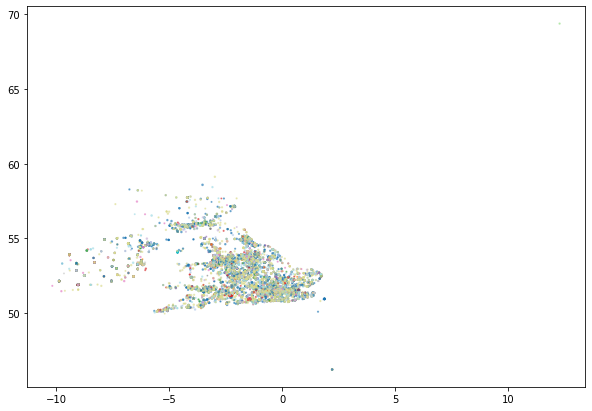

In [36]:
import pickle
import matplotlib.pyplot as plt
tweets = tlda.tweet_df
#tweets,topics = pickle.load(open("D://twitter_data/indonesia_results.pkl","rb"))
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(tweets.center_coord_X, tweets.center_coord_Y, s=tweets.pred_score*3, c=tweets.pred_topic, cmap="tab20",alpha=0.5)
print(tweets.shape)

(7578, 50)
Wall time: 36.7 s


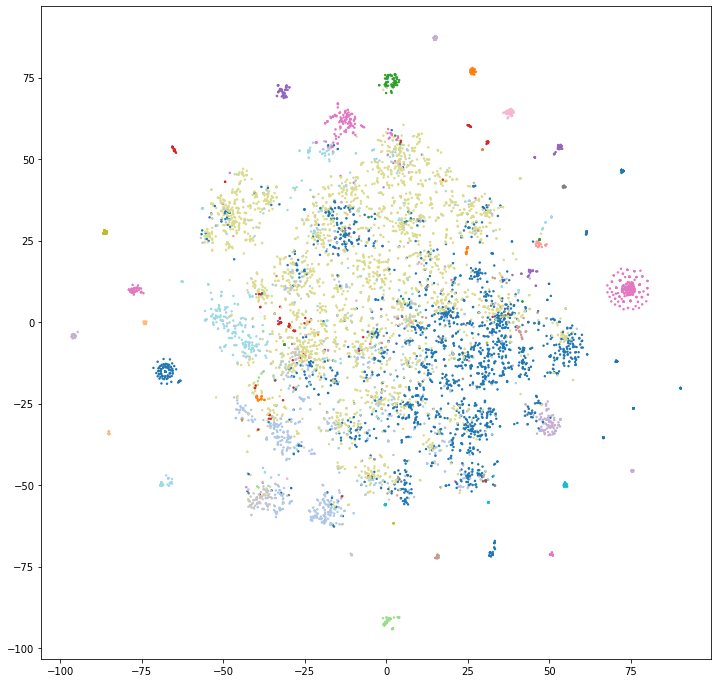

In [37]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = stop_words, max_df = 0.9, min_df = 10)
from sklearn.decomposition import TruncatedSVD
#doc_df, doc_tokens, tweet_df, vectorizer
tweets = tlda.tweet_df
tweets = tweets[tlda.tweet_df.pred_score>0.7]
tocs = tfidf.fit_transform(tweets.full_text)
sdv = TruncatedSVD(n_components=50, random_state=5)
sdv_tocs = sdv.fit_transform(tocs)


from sklearn.manifold import TSNE
print(sdv_tocs.shape)
tsne = TSNE(random_state=5)
res = tsne.fit_transform(sdv_tocs)
res = pd.DataFrame(res, columns=["x","y"])
fix,ax = plt.subplots(figsize=(12,12))
plt.scatter(res.x,res.y, s=2, c = tweets.pred_topic, cmap="tab20")

In [75]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
m =tlda
lda = m.model
dictionary = m.doc_id2bigram
corpus = m.corpus_bi

p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p, identifier+".html")
#pyLDAvis.show(p)

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
